In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
file_list = ["vascular_multimodal_dataset_{}.csv".format(i) for i in range(1, 9)]

In [8]:
file_list

['vascular_multimodal_dataset_1.csv',
 'vascular_multimodal_dataset_2.csv',
 'vascular_multimodal_dataset_3.csv',
 'vascular_multimodal_dataset_4.csv',
 'vascular_multimodal_dataset_5.csv',
 'vascular_multimodal_dataset_6.csv',
 'vascular_multimodal_dataset_7.csv',
 'vascular_multimodal_dataset_8.csv']

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

def calculate_vif_(X, thresh=150):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            #print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

   # print('Remaining variables:')
   # print(X.columns[variables])
    return X[cols[variables]]

def buildModel(Y, MCI_df):
    X_train, X_test, y_train, y_test = train_test_split(MCI_df.index, Y, test_size=0.2)

    print("Number of train datapoints: {}".format(X_train.shape[0]))
    print("Number of test datapoints: {}".format(y_test.shape[0]))

    lm = LinearRegression()
    lm.fit(MCI_df.iloc[X_train], y_train)

    predictions_lm = lm.predict(MCI_df.iloc[X_test])
    
    mse = np.sqrt(np.mean((y_test - predictions_lm) ** 2))
    print ("The RMSE from Linear Model with one train/test split: {}".format(mse))

    mse_naive = np.sqrt(np.mean((np.mean(y_train) - y_test) ** 2))
    print ("The RMSE from Naive prediction: {}".format(mse_naive))
    
    #seeing if XGBoost can improve our performance
    xgb = xgboost.XGBRegressor()
    xgb.fit(MCI_df.iloc[X_train], y_train)
    
    predictions_xgb = xgb.predict(MCI_df.iloc[X_test])
    
    rmse_xgb = np.sqrt(np.mean((y_test - predictions_xgb) ** 2))
    print ("The RMSE from XGBoost with one train/test split: {}".format(rmse_xgb))
    
    if(rmse_xgb < mse):
        return xgb
    else:
        return lm

Analysing Dataset: vascular_multimodal_dataset_1.csv


e:\programs\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
e:\programs\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Number of train datapoints: 8
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.23292082281387083
The RMSE from Naive prediction: 0.06640625000000003
The RMSE from XGBoost with one train/test split: 0.2674450972728789
Analysing Dataset: vascular_multimodal_dataset_2.csv


e:\programs\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
e:\programs\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Number of train datapoints: 8
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.17002818039782408
The RMSE from Naive prediction: 0.4788622787725611
The RMSE from XGBoost with one train/test split: 0.3107206606489409
Analysing Dataset: vascular_multimodal_dataset_3.csv


e:\programs\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
e:\programs\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Number of train datapoints: 8
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.05758657604544256
The RMSE from Naive prediction: 0.3206933711214655
The RMSE from XGBoost with one train/test split: 0.14417616886039764
Analysing Dataset: vascular_multimodal_dataset_4.csv


e:\programs\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
e:\programs\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Number of train datapoints: 8
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.13248629477200985
The RMSE from Naive prediction: 0.20614491878060565
The RMSE from XGBoost with one train/test split: 0.3286411075763989
Analysing Dataset: vascular_multimodal_dataset_5.csv


e:\programs\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
e:\programs\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Number of train datapoints: 4
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.2214049429526708
The RMSE from Naive prediction: 0.25739075352467505
The RMSE from XGBoost with one train/test split: 0.13782726150103733
Analysing Dataset: vascular_multimodal_dataset_6.csv


e:\programs\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
e:\programs\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Number of train datapoints: 4
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.18215775492533798
The RMSE from Naive prediction: 0.44176492617680735
The RMSE from XGBoost with one train/test split: 0.24795634255165055
Analysing Dataset: vascular_multimodal_dataset_7.csv


e:\programs\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
e:\programs\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
e:\programs\python36\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Number of train datapoints: 4
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.4842777218342605
The RMSE from Naive prediction: 0.43732139211339754
The RMSE from XGBoost with one train/test split: 0.5714993896869616
Analysing Dataset: vascular_multimodal_dataset_8.csv


e:\programs\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
e:\programs\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
e:\programs\python36\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Number of train datapoints: 4
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.09367481809261775
The RMSE from Naive prediction: 0.275
The RMSE from XGBoost with one train/test split: 0.5436544433116304


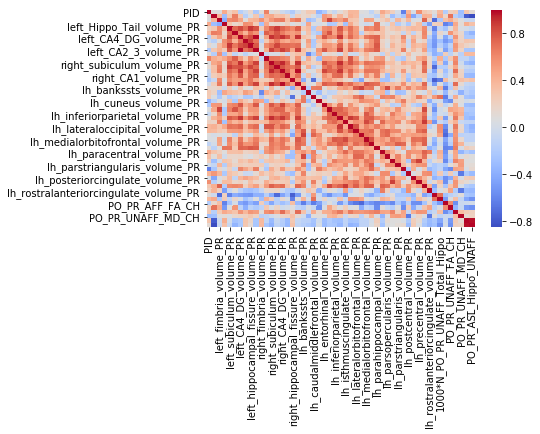

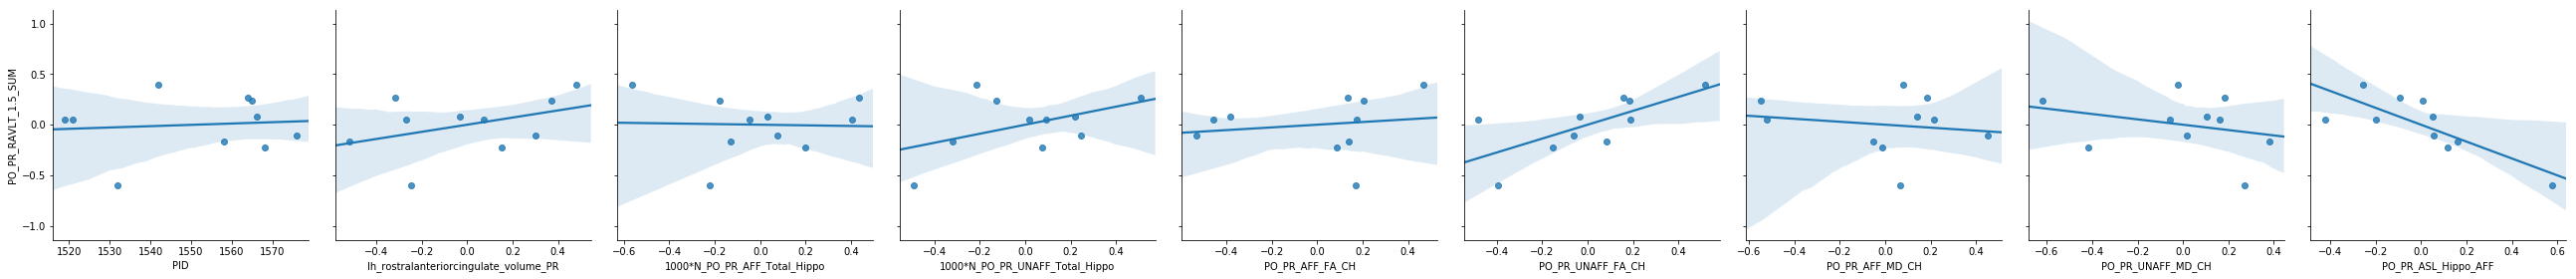

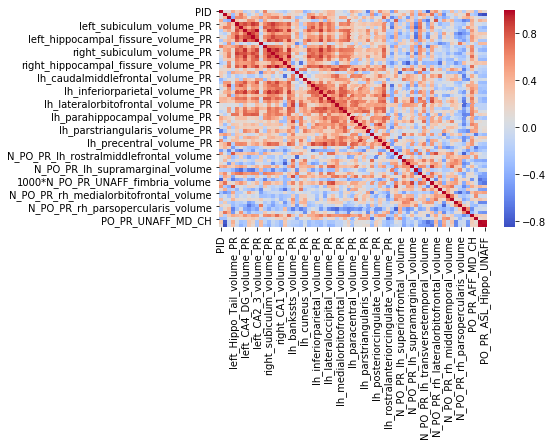

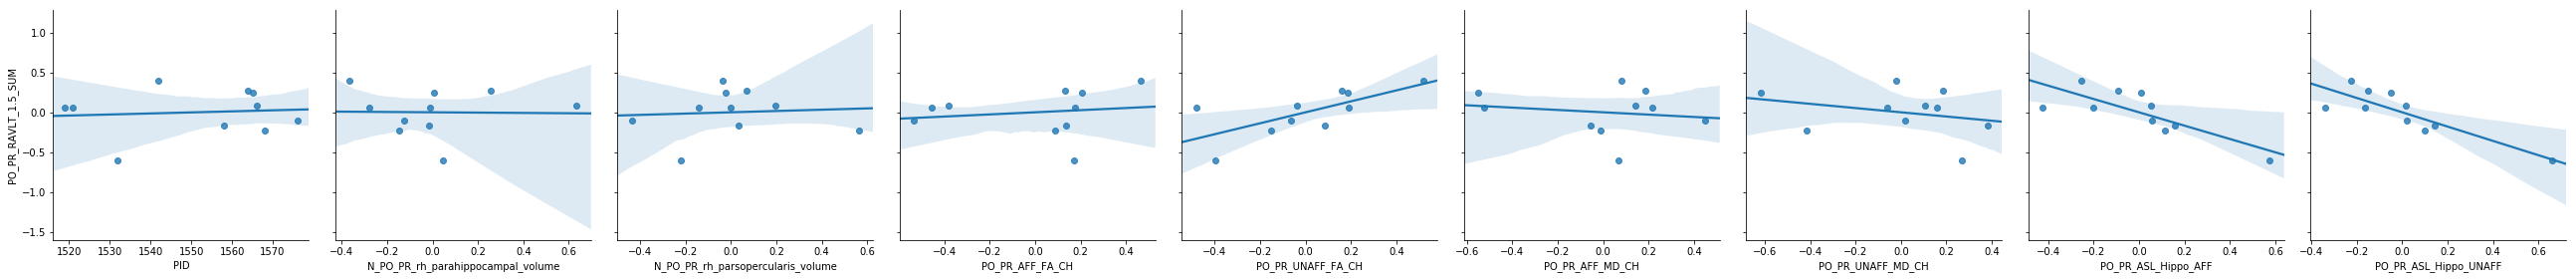

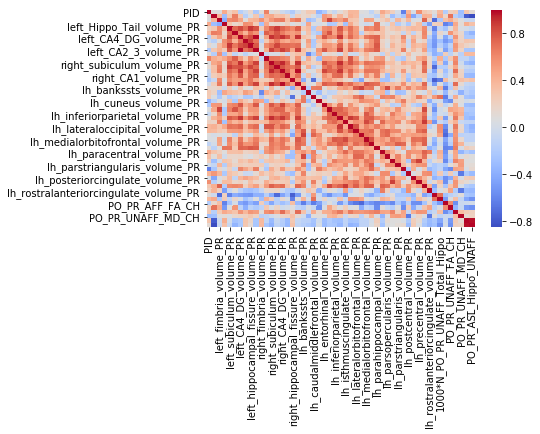

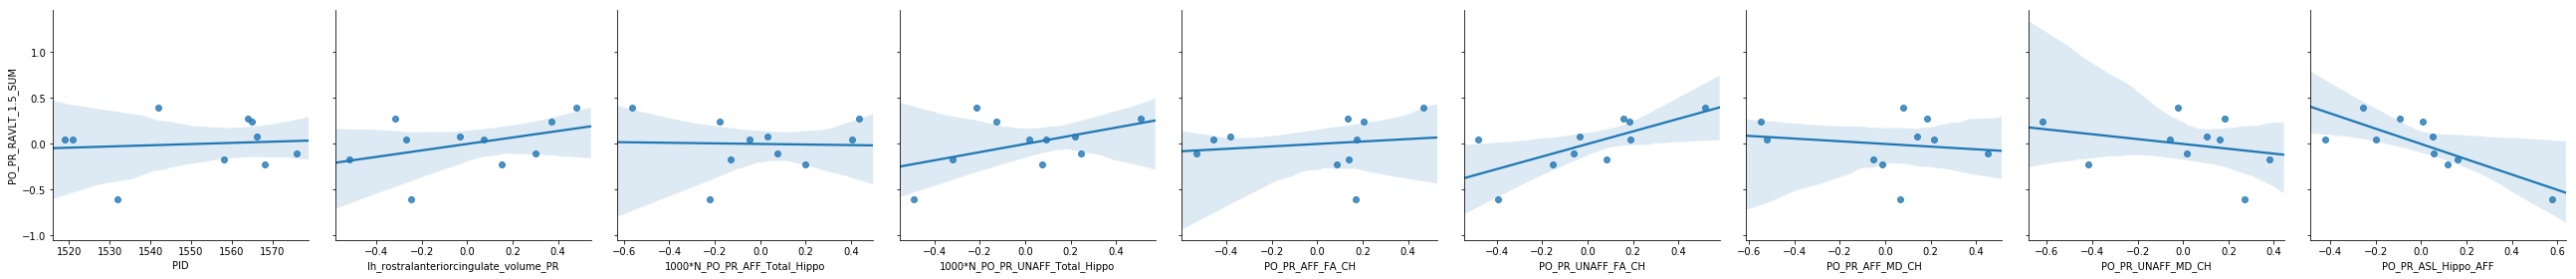

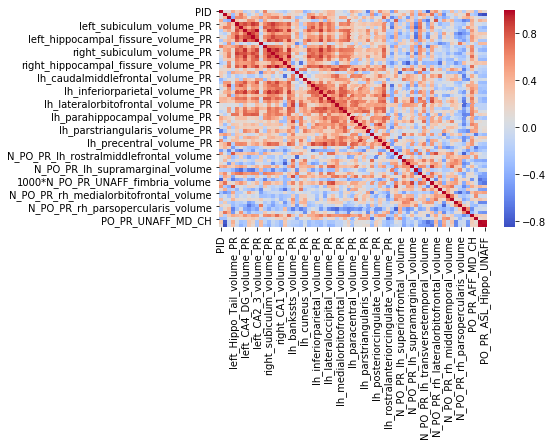

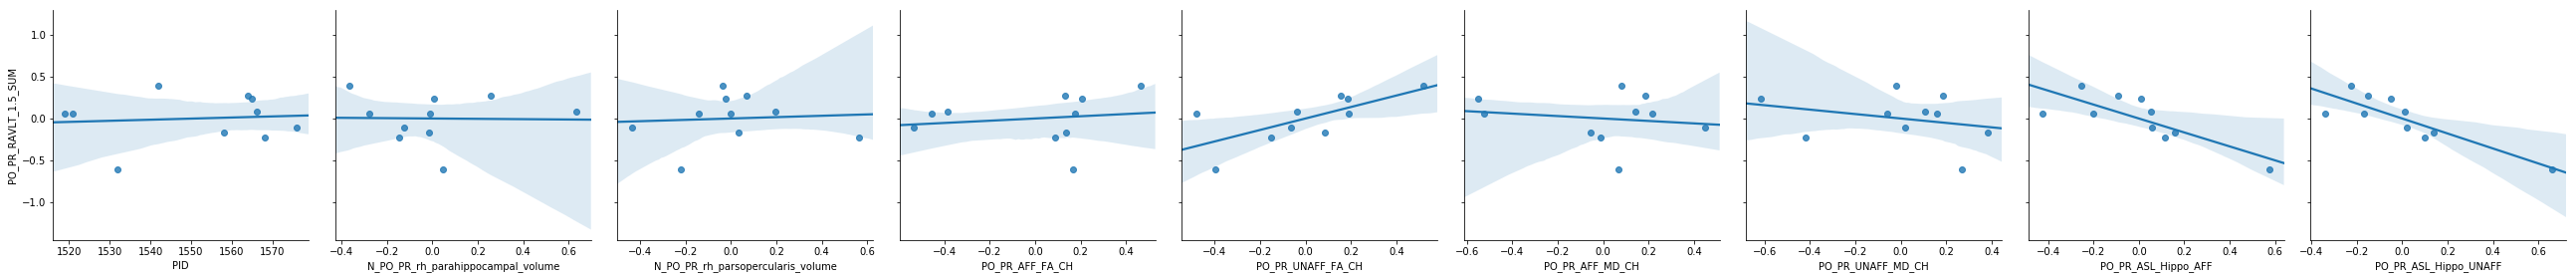

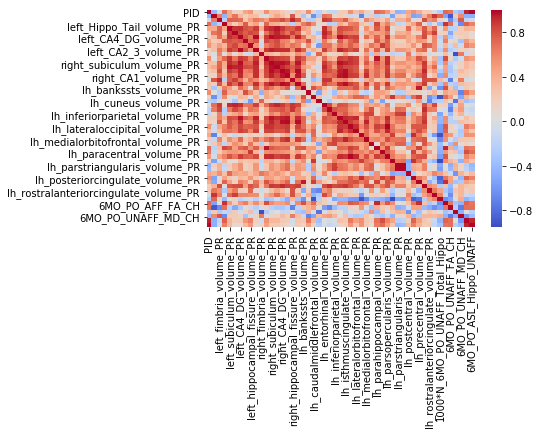

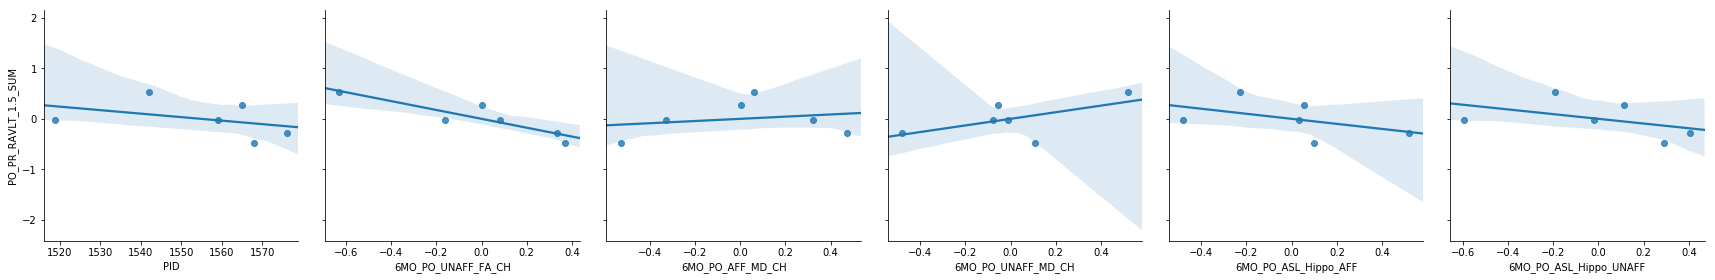

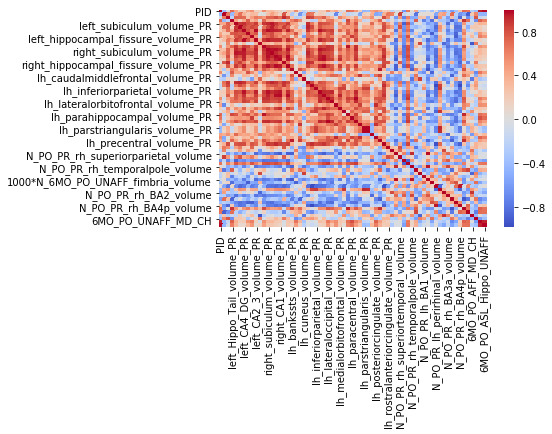

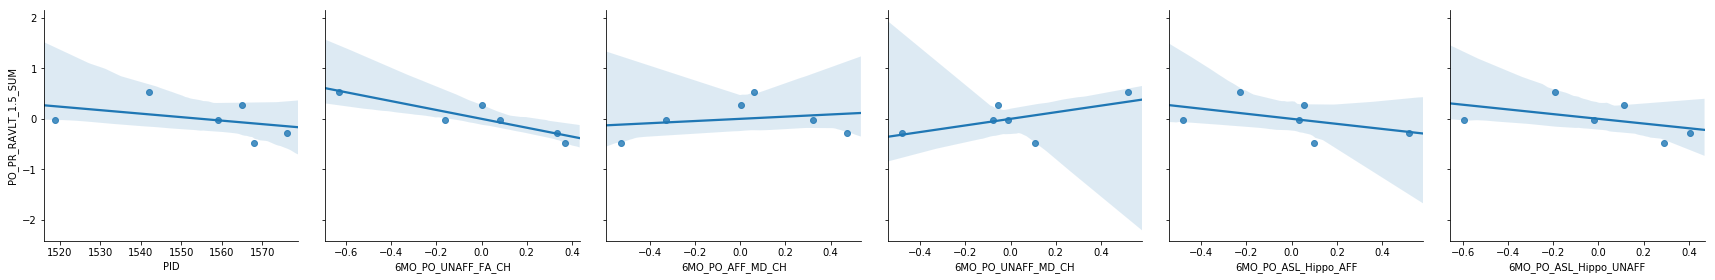

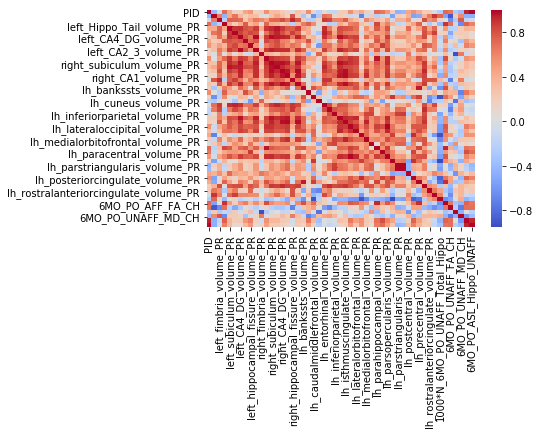

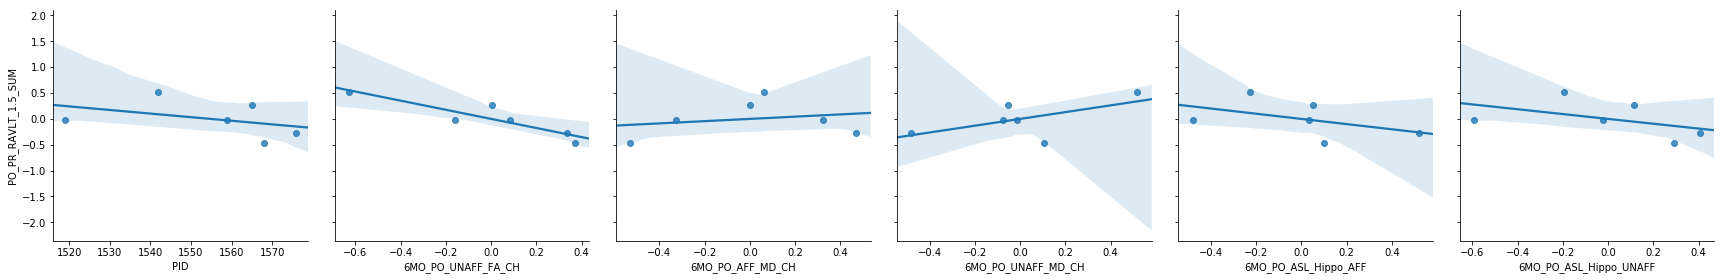

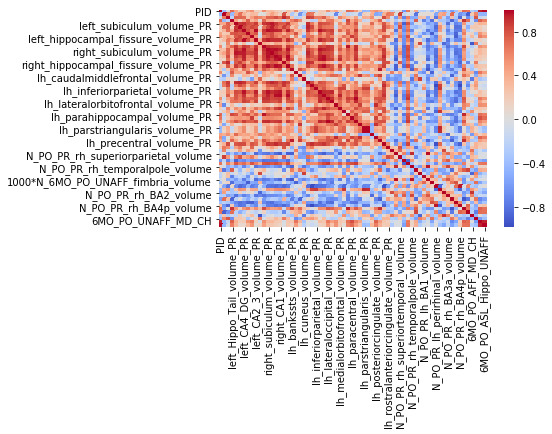

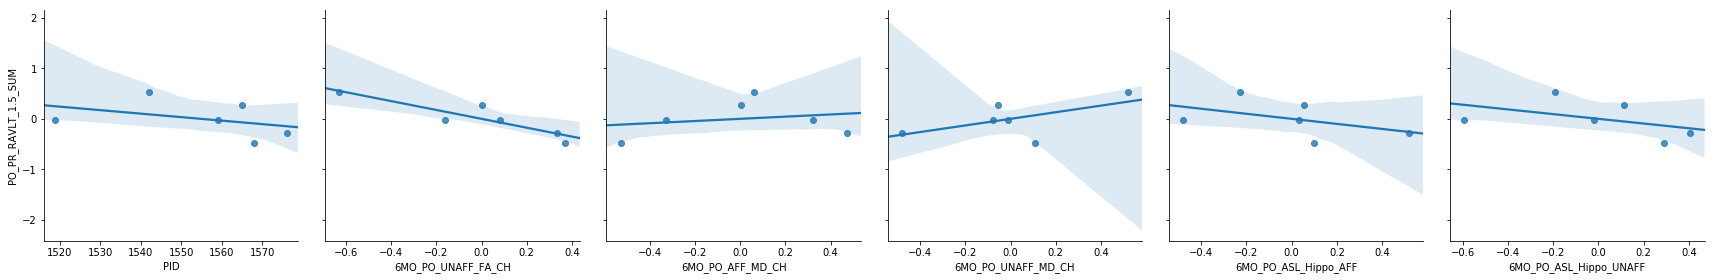

In [10]:
import matplotlib.pyplot as plt

def doAnalysis(file):
    print("Analysing Dataset: {}".format(file))
    df = pd.read_csv(file)
    
#     plt.figure()
#     sns.heatmap(df.corr(), cmap='coolwarm')
    
    Y = df['PO_PR_RAVLT_1.5_SUM']
    MCI_df = calculate_vif_(df)
    MCI_df['PO_PR_RAVLT_1.5_SUM'] = Y
    
    plt.figure()
    sns.heatmap(df.corr(), cmap='coolwarm')
    
    #plotting the correlation of the feature variables with the target variable
    plt.figure()
    sns.pairplot(MCI_df, x_vars=MCI_df.columns[:-1], y_vars = ['PO_PR_RAVLT_1.5_SUM'], kind="reg", height=4)
    
    MCI_df.drop('PO_PR_RAVLT_1.5_SUM', axis=1)
    model = buildModel(Y, MCI_df)
    
    

models = []
for file in file_list:
    models.append(doAnalysis(file))

In [11]:
sets = [set(pd.read_csv(file_list[i])) for i in range(8)]
result = sets[0]
for s in sets:
    result = result.intersection(s)
intersect_cols = list(result)

dfs = [pd.read_csv(file_list[i]) for i in range(8)]
MCI_df = pd.concat(dfs, ignore_index=True)
print(MCI_df.shape)


MCI_df = MCI_df[intersect_cols]

(64, 95)


e:\programs\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Training Linear Model
Number of train datapoints: 51
Number of test datapoints: 13
The RMSE from Linear Model with one train/test split: 0.029315942394506477
The RMSE from Naive prediction: 0.26107315221368566
The RMSE from Linear Model fold #1: 0.028704916200789368
The RMSE from Linear Model fold #2: 0.03120135064973794
The RMSE from Linear Model fold #3: 0.032605181048096135
The RMSE from Linear Model fold #4: 0.036877867502718716
The RMSE from Linear Model fold #5: 0.0383043918513895
The MSE from XGB Model fold #1: 0.0007201528159611987
The MSE from XGB Model fold #2: 0.00035383960458193584
The MSE from XGB Model fold #3: 0.00043043344119208485
The MSE from XGB Model fold #4: 0.0006858145767799194
The MSE from XGB Model fold #5: 0.0006957114342427343


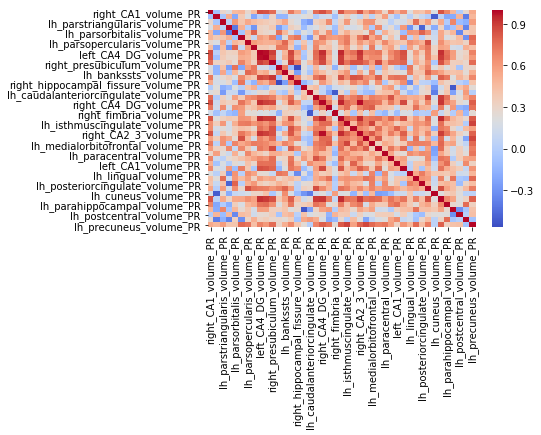

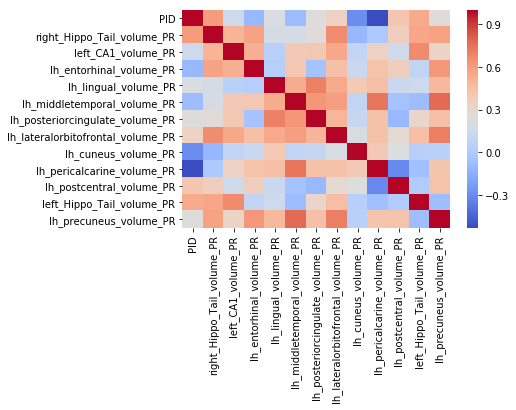

In [12]:
plt.figure()
sns.heatmap(MCI_df.corr(), cmap='coolwarm')

Y = MCI_df['PO_PR_RAVLT_1.5_SUM']
MCI_df = calculate_vif_(MCI_df)

plt.figure()
sns.heatmap(MCI_df.corr(), cmap='coolwarm')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

print("Training Linear Model")
X_train, X_test, y_train, y_test = train_test_split(MCI_df.index, Y, test_size=0.2)

print("Number of train datapoints: {}".format(X_train.shape[0]))
print("Number of test datapoints: {}".format(y_test.shape[0]))

lm = LinearRegression()
lm.fit(MCI_df.iloc[X_train], y_train)

predictions = lm.predict(MCI_df.iloc[X_test])

rmse = np.sqrt(np.mean((y_test - predictions) ** 2))
print ("The RMSE from Linear Model with one train/test split: {}".format(rmse))

rmse_naive = np.sqrt(np.mean((np.mean(y_train) - y_test) ** 2))
print ("The RMSE from Naive prediction: {}".format(rmse_naive))

kf = KFold(n_splits=5)
kf.get_n_splits(MCI_df)

c=1
for train_index, test_index in kf.split(MCI_df):
    X_train, X_test = MCI_df.iloc[train_index], MCI_df.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)

    rmse = np.sqrt(np.mean((y_test - predictions) ** 2))
    print ("The RMSE from Linear Model fold #{}: {}".format(c,rmse))
    c= c+1
    


import xgboost

xgb = xgboost.XGBRegressor()

c=1
for train_index, test_index in kf.split(MCI_df):
    X_train, X_test = MCI_df.iloc[train_index], MCI_df.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    xgb.fit(X_train, y_train)
    predictions = xgb.predict(X_test)

    rmse = np.sqrt(np.mean((y_test - predictions) ** 2))
    print ("The MSE from XGB Model fold #{}: {}".format(c,rmse))
    c= c+1